In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tools import compute_PCA, compute_TSNE, load_data

**Multiclass classification**

In [2]:
X, y, _, p = load_data([ps for ps in range(1, 16)], z_score_norm="participant_meanfree")
X = X.reshape(X.shape[0], X.shape[1] * X.shape[1])

load: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15']
before: 0.010833320819703356 0.0138765904356241
after global: 3.3453047822980234e-16 1.0
before: 0.014157458413294332 0.019697427174936128
after global: 5.144634718234897e-16 0.9999999999999999
before: 0.009671310470783361 0.01382165546457677
after global: 5.894732537024589e-17 0.9999999999999996
before: 0.014321327169414132 0.02092426207628347
after global: -8.412627794765627e-17 0.9999999999999994
before: 0.008012871473850146 0.008465251726686069
after global: -2.9350674187145196e-16 0.9999999999999999
before: 0.015501076883670332 0.020161922062374903
after global: -2.3778118615833976e-16 0.9999999999999998
before: 0.005785778427333883 0.008299444524589267
after global: -9.745232778682356e-18 1.0
before: 0.01421073297731075 0.016707890764832815
after global: -1.4497636640483996e-16 0.9999999999999998
before: 0.0105969642036091 0.012696071282817526
after global: 2.4956514487

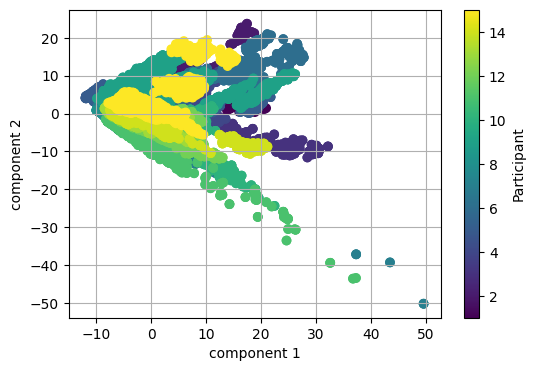

In [3]:
compute_PCA(
    X,
    feature=p,
    feature_label="Participant",
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE: 61.81820259024875
R² Score: 0.9872839310622569


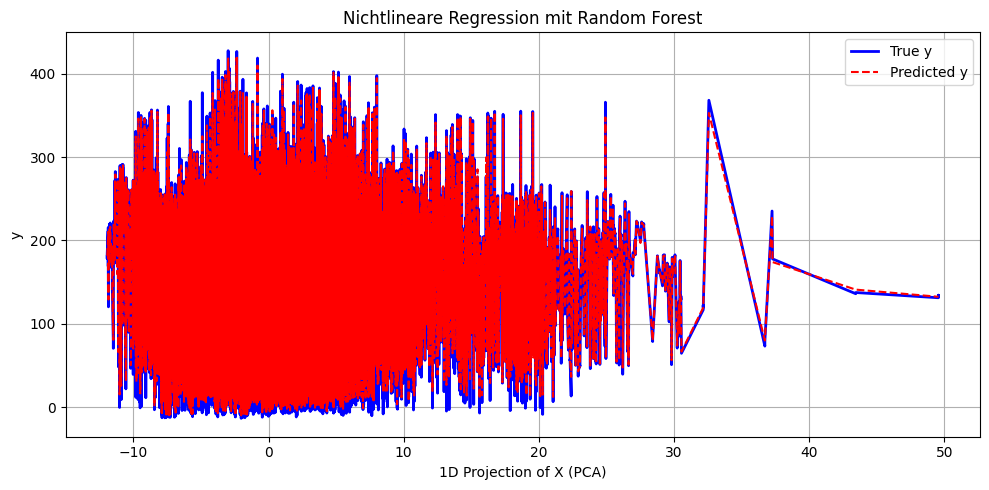

In [4]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

pca = PCA(n_components=1)
X_vis = pca.fit_transform(X)

sort_idx = np.argsort(X_vis[:, 0])
X_vis_sorted = X_vis[sort_idx]
y_sorted = y[sort_idx]
y_pred_sorted = model.predict(X[sort_idx])

plt.figure(figsize=(10, 5))
plt.plot(X_vis_sorted, y_sorted, label="True y", color="blue", linewidth=2)
plt.plot(X_vis_sorted, y_pred_sorted, label="Predicted y", color="red", linestyle="--")
plt.xlabel("1D Projection of X (PCA)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

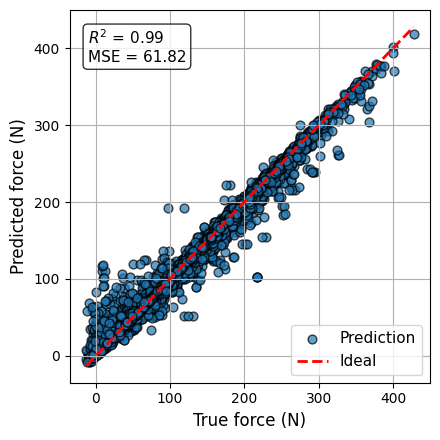

In [31]:
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(4.5, 4.5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", s=40, label="Prediction")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--", lw=2, label="Ideal"
)

# Beschriftungen
plt.xlabel("True force (N)", fontsize=12)
plt.ylabel("Predicted force (N)", fontsize=12)
# R²-Wert einfügen
plt.text(
    0.05,
    0.95,
    f"$R^2$ = {r2:.2f}\nMSE = {MSE:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

plt.legend(fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.savefig("results/RandomForestRegressor_TT.pdf")
plt.show()

In [30]:
np.savez(
    "results/RandomForestRegressor.npz",
    y_pred=y_pred,
    y_test=y_test,
    MSE=MSE,
    R2_Score=r2,
    note="TrainTestSplitWithAllIndivisuals",
)

**LOOCV**

In [40]:
from collections import defaultdict

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X, y, _, p = load_data([ps for ps in range(1, 16)], z_score_norm="participant_meanfree")
X = X.reshape(X.shape[0], X.shape[1] * X.shape[1])
unique_subjects = np.unique(p)

y_true_all = []
y_pred_all = []

person_scores = defaultdict(dict)

load: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15']
before: 0.010833320819703356 0.0138765904356241
after global: 3.3453047822980234e-16 1.0
before: 0.014157458413294332 0.019697427174936128
after global: 5.144634718234897e-16 0.9999999999999999
before: 0.009671310470783361 0.01382165546457677
after global: 5.894732537024589e-17 0.9999999999999996
before: 0.014321327169414132 0.02092426207628347
after global: -8.412627794765627e-17 0.9999999999999994
before: 0.008012871473850146 0.008465251726686069
after global: -2.9350674187145196e-16 0.9999999999999999
before: 0.015501076883670332 0.020161922062374903
after global: -2.3778118615833976e-16 0.9999999999999998
before: 0.005785778427333883 0.008299444524589267
after global: -9.745232778682356e-18 1.0
before: 0.01421073297731075 0.016707890764832815
after global: -1.4497636640483996e-16 0.9999999999999998
before: 0.0105969642036091 0.012696071282817526
after global: 2.4956514487

In [ ]:
for test_subject in unique_subjects:
    train_idx = p != test_subject
    test_idx = p == test_subject

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    person_scores[test_subject]["MSE"] = mse
    person_scores[test_subject]["R2"] = r2

    np.savez(
        f"results/RandomForestRegressor_test_subject{test_subject}.npz",
        y_pred=y_pred,
        y_test=y_test,
        MSE=mse,
        R2_Score=r2,
        note=f"tested_with_{test_subject}",
    )
    print(f"Person {test_subject}: MSE = {mse:.3f}, R² = {r2:.3f}")

y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)

overall_mse = mean_squared_error(y_true_all, y_pred_all)
overall_r2 = r2_score(y_true_all, y_pred_all)

print("\n=== Total Results ===")
print(f"Mean Squared Error (total): {overall_mse:.3f}")
print(f"R² Score (total): {overall_r2:.3f}")

Person 1: MSE = 3956.861, R² = -0.428
Person 2: MSE = 5416.793, R² = -0.061
Person 3: MSE = 6223.287, R² = -0.158
Person 4: MSE = 7733.329, R² = -0.199
Person 5: MSE = 5764.555, R² = -0.191


In [ ]:
X, y, _, p = load_data([ps for ps in range(1, 16)], z_score_norm="global")
X = X.reshape(X.shape[0], X.shape[1] * X.shape[1])
unique_subjects = np.unique(p)

y_true_all = []
y_pred_all = []

person_scores = defaultdict(dict)

for test_subject in unique_subjects:
    train_idx = p != test_subject
    test_idx = p == test_subject

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    person_scores[test_subject]["MSE"] = mse
    person_scores[test_subject]["R2"] = r2

    np.savez(
        f"results/RandomForestRegressor_normGlobal_test_subject{test_subject}.npz",
        y_pred=y_pred,
        y_test=y_test,
        MSE=mse,
        R2_Score=r2,
        note=f"tested_with_{test_subject}",
    )
    print(f"Person {test_subject}: MSE = {mse:.3f}, R² = {r2:.3f}")

y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)

overall_mse = mean_squared_error(y_true_all, y_pred_all)
overall_r2 = r2_score(y_true_all, y_pred_all)

print("\n=== Total Results ===")
print(f"Mean Squared Error (total): {overall_mse:.3f}")
print(f"R² Score (total): {overall_r2:.3f}")

___

_archive_

In [18]:
X_mc = list()
Y_mc = list()
for xs, ys in zip(X, y):
    yr = np.round(ys, -1)
    if yr >= 20 and yr <= 300:
        X_mc.append(xs)
        Y_mc.append(yr)
X_mc = np.array(X_mc)
Y_mc = np.array(Y_mc, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(
    X_mc, Y_mc, test_size=0.2, random_state=42
)

**SVM**

**Random Forest**

**Random Forest - train test split**

___